In [ ]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('drive/MyDrive/credit_risk_dataset.csv')

In [ ]:
df.shape

(32581, 12)

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.describe(include = ['object'])

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [ ]:
df.person_home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
df.loan_intent.unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [ ]:
df.loan_grade.unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [ ]:
df.cb_person_default_on_file.unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df[df.duplicated(keep = 'first')]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
df.shape

(32416, 12)

In [ ]:
df[df.duplicated(keep = 'first')]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
(df.isnull().sum() / len(df)).sort_values(ascending = False) * 100

loan_int_rate                 9.547754
person_emp_length             2.736303
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(28501, 12)

In [ ]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

<Axes: ylabel='person_income'>

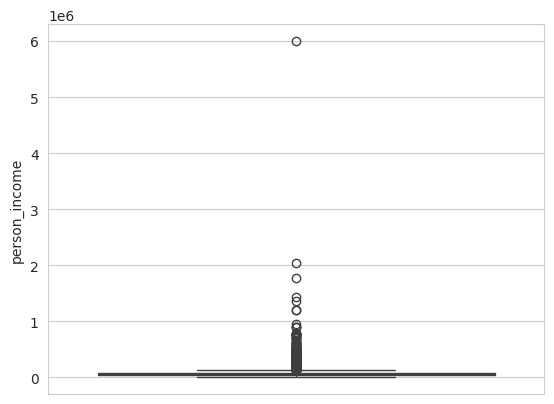

In [ ]:
sns.boxplot(df.person_income)

In [ ]:
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

40500.0

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = (df['person_income'] < lower_bound) | (df['person_income'] > upper_bound)
df = df[~outliers]

<Axes: ylabel='loan_amnt'>

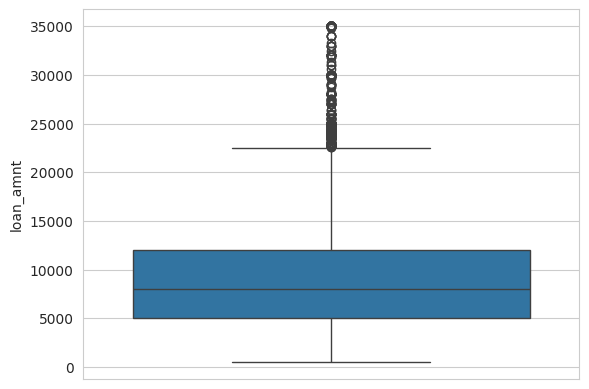

In [ ]:
sns.boxplot(df.loan_amnt)

In [ ]:
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

7000.0

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = (df['loan_amnt'] < lower_bound) | (df['loan_amnt'] > upper_bound)
df = df[~outliers]

<Axes: ylabel='loan_int_rate'>

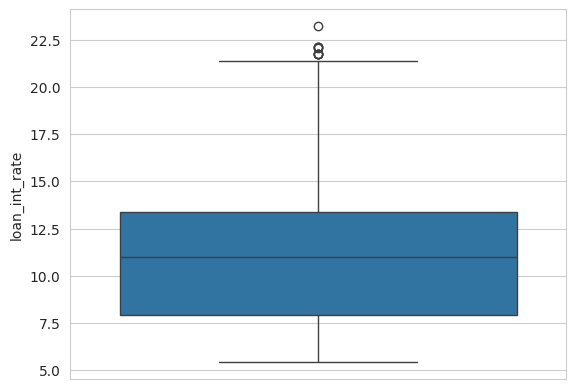

In [ ]:
sns.boxplot(df.loan_int_rate)

In [ ]:
Q1 = df['loan_int_rate'].quantile(0.25)
Q3 = df['loan_int_rate'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

5.459999999999999

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = (df['loan_int_rate'] < lower_bound) | (df['loan_int_rate'] > upper_bound)
df = df[~outliers]

<Axes: ylabel='cb_person_cred_hist_length'>

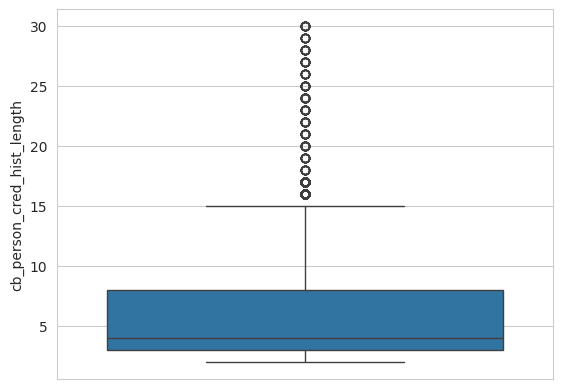

In [ ]:
sns.boxplot(df.cb_person_cred_hist_length)

In [ ]:
Q1 = df['cb_person_cred_hist_length'].quantile(0.25)
Q3 = df['cb_person_cred_hist_length'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

5.0

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = (df['cb_person_cred_hist_length'] < lower_bound) | (df['cb_person_cred_hist_length'] > upper_bound)
df = df[~outliers]

<Axes: ylabel='person_age'>

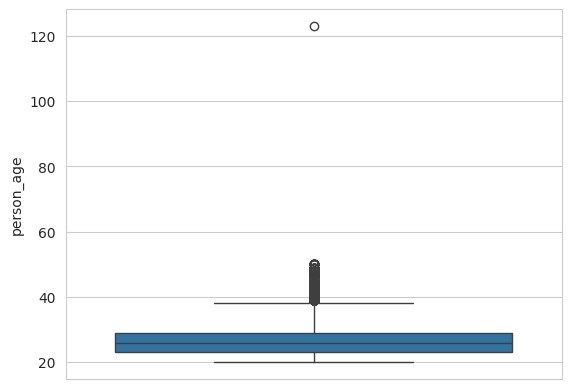

In [ ]:
sns.boxplot(df.person_age)

In [ ]:
Q1 = df['person_age'].quantile(0.25)
Q3 = df['person_age'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

6.0

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = (df['person_age'] < lower_bound) | (df['person_age'] > upper_bound)
df = df[~outliers]

<Axes: ylabel='person_emp_length'>

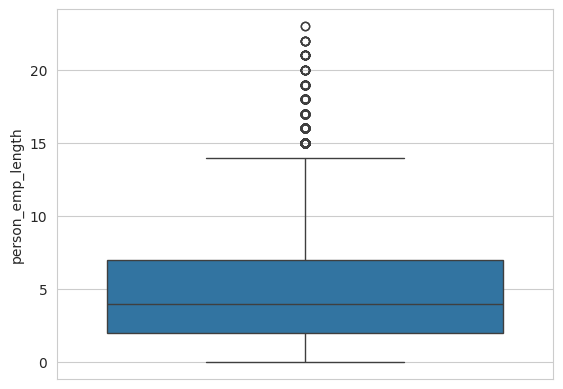

In [ ]:
sns.boxplot(df.person_emp_length)

In [ ]:
Q1 = df['person_emp_length'].quantile(0.25)
Q3 = df['person_emp_length'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

5.0

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = (df['person_emp_length'] < lower_bound) | (df['person_emp_length'] > upper_bound)
df = df[~outliers]

<Axes: ylabel='loan_percent_income'>

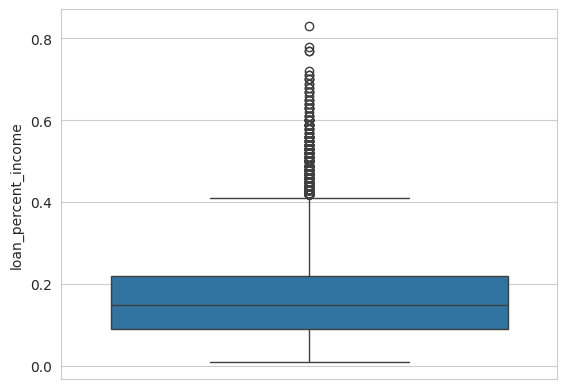

In [ ]:
sns.boxplot(df.loan_percent_income)

In [ ]:
Q1 = df['loan_percent_income'].quantile(0.25)
Q3 = df['loan_percent_income'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

0.13

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = (df['loan_percent_income'] < lower_bound) | (df['loan_percent_income'] > upper_bound)
df = df[~outliers]

In [ ]:
df.shape

(23084, 12)

(array([  56.,  369., 1003., 2021., 2321., 2341., 2791., 2194., 2441.,
        1582., 1326., 1148.,  780.,  616.,  635.,  395.,  239.,  454.,
         180.,  192.]),
 array([  4080. ,  10891.2,  17702.4,  24513.6,  31324.8,  38136. ,
         44947.2,  51758.4,  58569.6,  65380.8,  72192. ,  79003.2,
         85814.4,  92625.6,  99436.8, 106248. , 113059.2, 119870.4,
        126681.6, 133492.8, 140304. ]),
 <BarContainer object of 20 artists>)

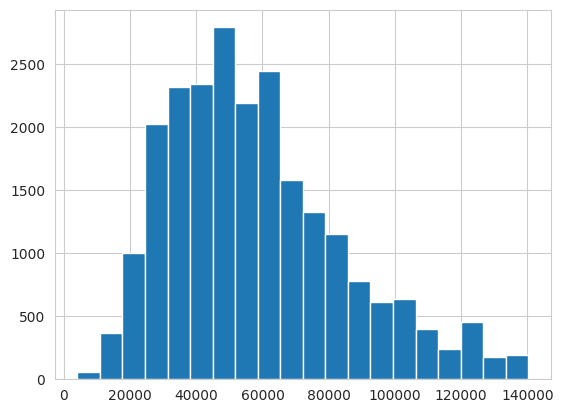

In [ ]:
plt.hist(df.person_income, bins = 20)

(array([  11.,  974., 2912., 3134., 2789., 2376., 1942., 1665., 1429.,
           0., 1280.,  934.,  776.,  662.,  583.,  477.,  442.,  292.,
         231.,  175.]),
 array([20. , 20.9, 21.8, 22.7, 23.6, 24.5, 25.4, 26.3, 27.2, 28.1, 29. ,
        29.9, 30.8, 31.7, 32.6, 33.5, 34.4, 35.3, 36.2, 37.1, 38. ]),
 <BarContainer object of 20 artists>)

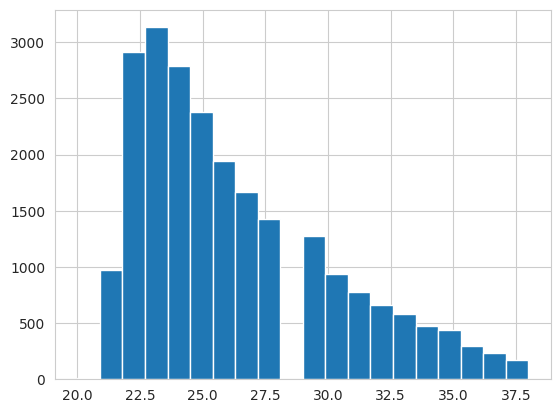

In [ ]:
plt.hist(df.person_age, bins = 20)

(array([3108., 2198., 2909.,    0., 2621., 2135.,    0., 2254., 2040.,
           0., 1697., 1260.,  965.,    0.,  516.,  515.,    0.,  386.,
         289.,  191.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ,
         7.7,  8.4,  9.1,  9.8, 10.5, 11.2, 11.9, 12.6, 13.3, 14. ]),
 <BarContainer object of 20 artists>)

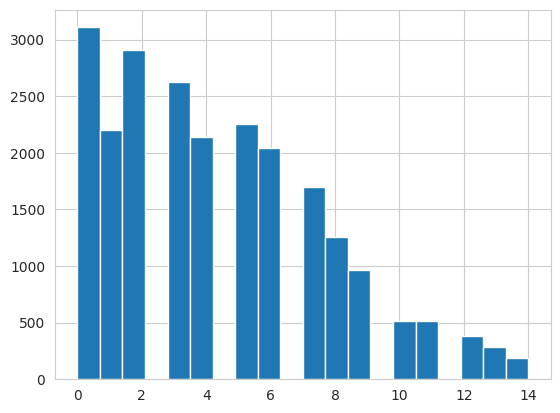

In [ ]:
plt.hist(df.person_emp_length, bins = 20)

(array([ 691., 1413., 1792., 1843., 2331., 2908., 2069., 1101., 2480.,
         626., 1611.,  474.,  573., 1149.,  456.,  497.,  112.,  724.,
         131.,  103.]),
 array([  500.,  1600.,  2700.,  3800.,  4900.,  6000.,  7100.,  8200.,
         9300., 10400., 11500., 12600., 13700., 14800., 15900., 17000.,
        18100., 19200., 20300., 21400., 22500.]),
 <BarContainer object of 20 artists>)

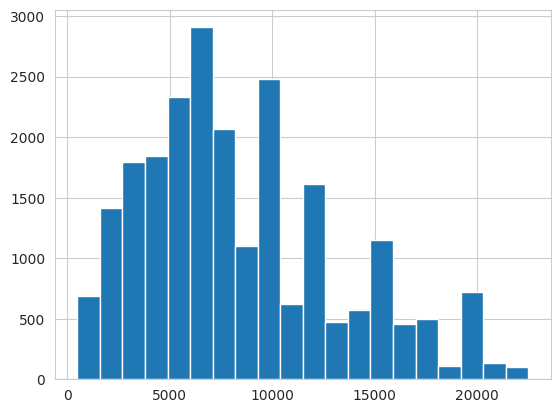

In [ ]:
plt.hist(df.loan_amnt, bins = 20)

(array([1610., 1357., 2263., 1687.,  948., 1486., 2409., 1854., 1790.,
        1910., 1787., 1499.,  936.,  761.,  360.,  192.,  113.,   70.,
          28.,   24.]),
 array([ 5.42 ,  6.217,  7.014,  7.811,  8.608,  9.405, 10.202, 10.999,
        11.796, 12.593, 13.39 , 14.187, 14.984, 15.781, 16.578, 17.375,
        18.172, 18.969, 19.766, 20.563, 21.36 ]),
 <BarContainer object of 20 artists>)

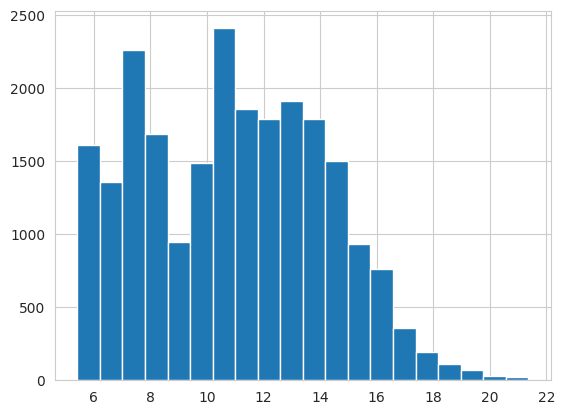

In [ ]:
plt.hist(df.loan_int_rate, bins = 20)

(array([4720., 4726.,    0., 4692., 1391.,    0., 1365., 1408.,    0.,
        1373., 1373.,    0., 1338.,  131.,    0.,  150.,  131.,    0.,
         152.,  134.]),
 array([ 2.  ,  2.65,  3.3 ,  3.95,  4.6 ,  5.25,  5.9 ,  6.55,  7.2 ,
         7.85,  8.5 ,  9.15,  9.8 , 10.45, 11.1 , 11.75, 12.4 , 13.05,
        13.7 , 14.35, 15.  ]),
 <BarContainer object of 20 artists>)

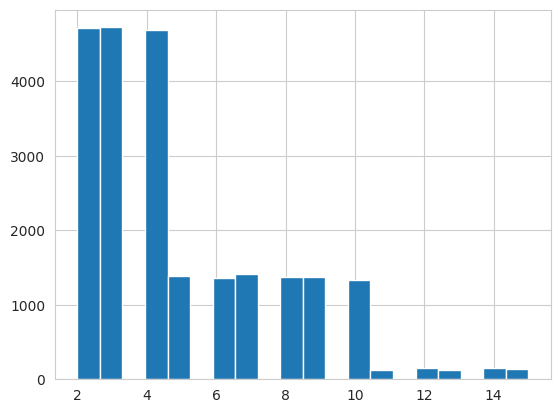

In [ ]:
plt.hist(df.cb_person_cred_hist_length, bins = 20)

<Axes: xlabel='person_home_ownership', ylabel='count'>

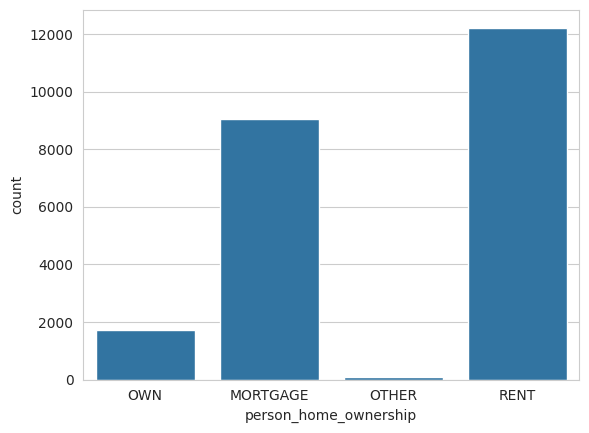

In [ ]:
sns.countplot(x = 'person_home_ownership', data = df)

<Axes: xlabel='loan_intent', ylabel='count'>

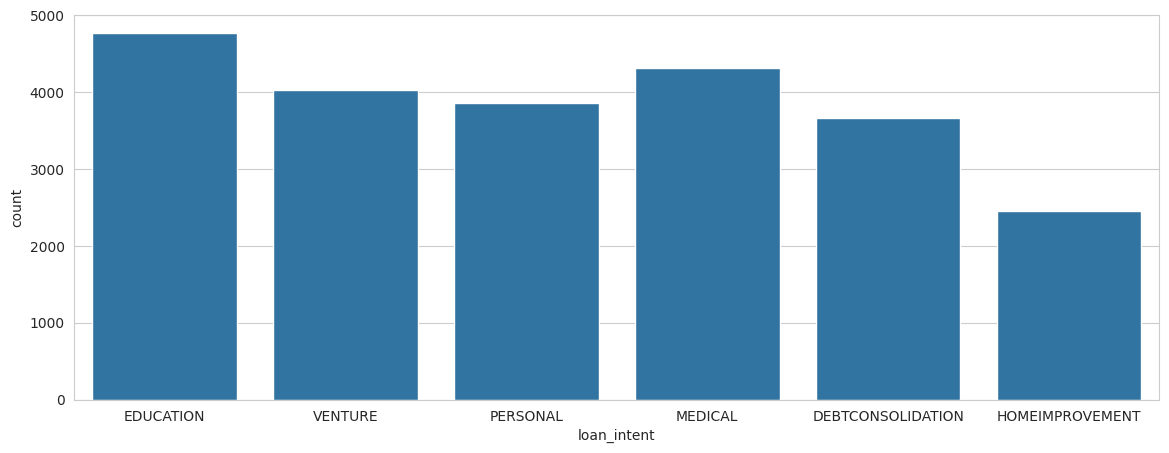

In [ ]:
plt.figure(figsize = (14, 5))
sns.countplot(x = 'loan_intent', data = df)

<Axes: xlabel='loan_grade', ylabel='count'>

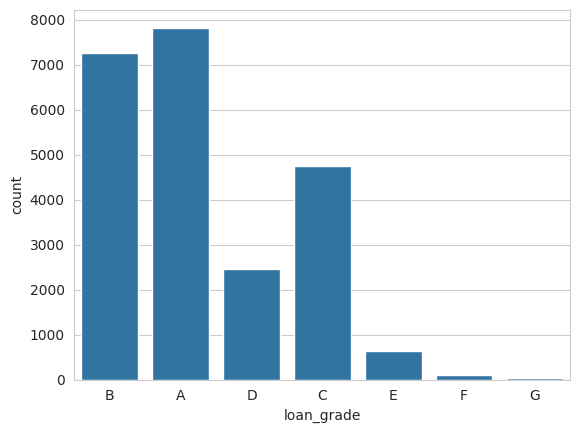

In [ ]:
sns.countplot(x = 'loan_grade', data = df)

<Axes: xlabel='loan_status', ylabel='count'>

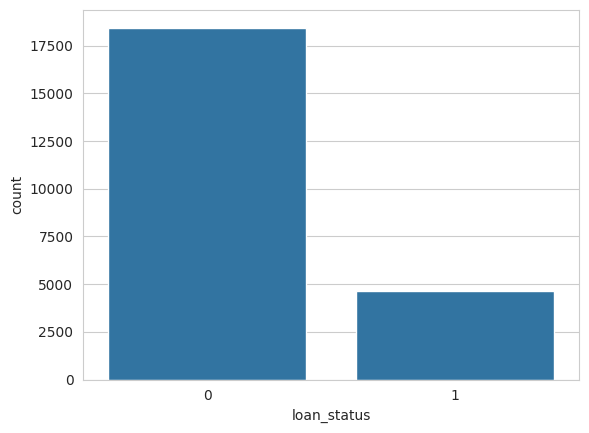

In [ ]:
sns.countplot(x = 'loan_status', data = df)

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

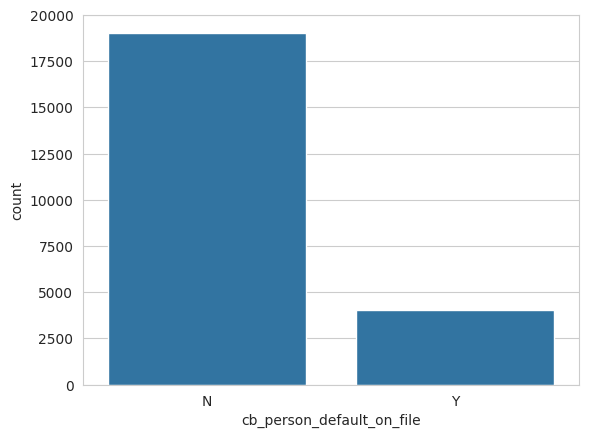

In [ ]:
sns.countplot(x = 'cb_person_default_on_file', data = df)

In [ ]:
df.person_home_ownership.value_counts(normalize = True)

person_home_ownership
RENT        0.529588
MORTGAGE    0.392263
OWN         0.074987
OTHER       0.003162
Name: proportion, dtype: float64

In [ ]:
df.loan_intent.value_counts(normalize = True)

loan_intent
EDUCATION            0.206637
MEDICAL              0.186623
VENTURE              0.174666
PERSONAL             0.166912
DEBTCONSOLIDATION    0.158898
HOMEIMPROVEMENT      0.106264
Name: proportion, dtype: float64

In [ ]:
df.loan_grade.value_counts(normalize = True)

loan_grade
A    0.338849
B    0.314807
C    0.205597
D    0.106871
E    0.027855
F    0.004852
G    0.001170
Name: proportion, dtype: float64

In [ ]:
df.loan_status.value_counts(normalize = True)

loan_status
0    0.798908
1    0.201092
Name: proportion, dtype: float64

In [ ]:
df.cb_person_default_on_file.value_counts(normalize = True)

cb_person_default_on_file
N    0.825334
Y    0.174666
Name: proportion, dtype: float64

<Axes: xlabel='loan_grade', ylabel='person_income'>

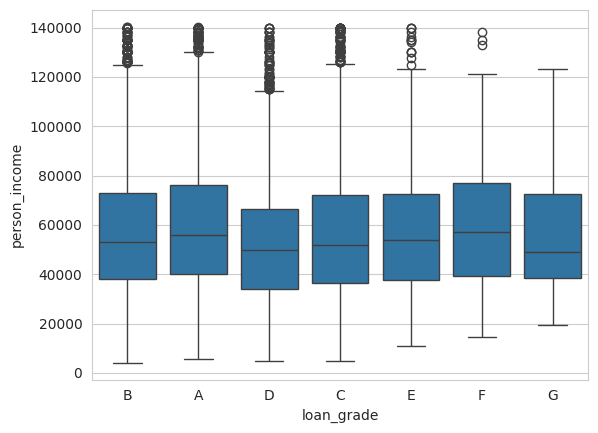

In [ ]:
sns.boxplot(x = 'loan_grade', y = 'person_income', data = df)

<Axes: xlabel='loan_grade', ylabel='loan_int_rate'>

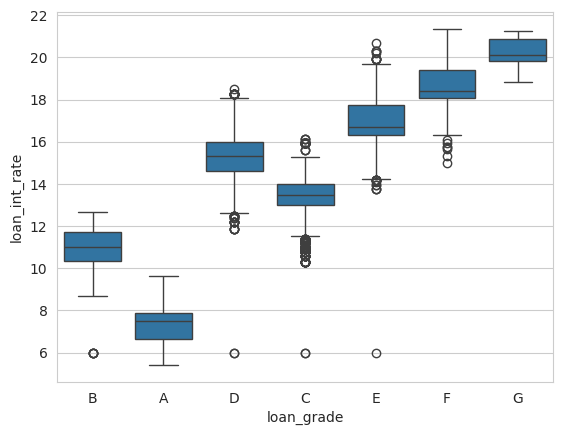

In [ ]:
sns.boxplot(x = 'loan_grade', y = 'loan_int_rate', data = df)

<Axes: xlabel='person_home_ownership', ylabel='count'>

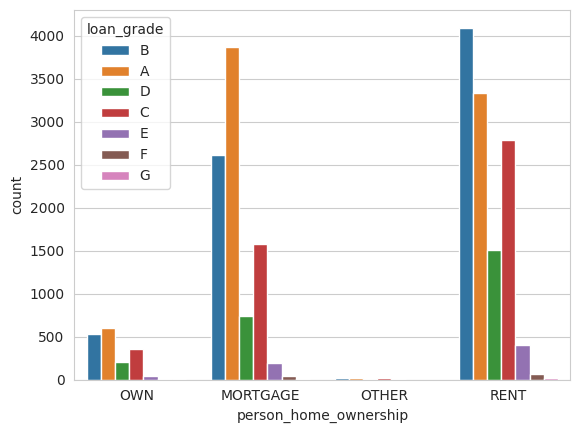

In [ ]:
sns.countplot(x = 'person_home_ownership', hue = 'loan_grade', data = df)

<Axes: xlabel='loan_grade', ylabel='loan_amnt'>

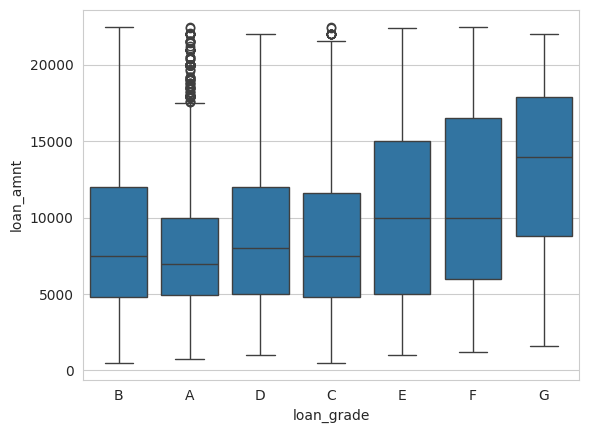

In [ ]:
sns.boxplot(x = 'loan_grade', y = 'loan_amnt', data = df)

<Axes: xlabel='loan_grade', ylabel='cb_person_cred_hist_length'>

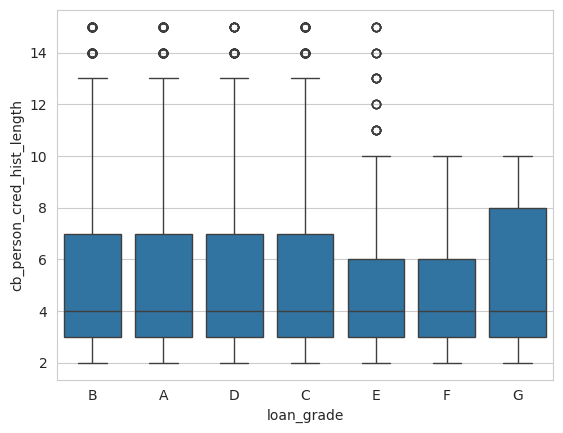

In [ ]:
sns.boxplot(x = 'loan_grade', y = 'cb_person_cred_hist_length', data = df)

<Axes: xlabel='loan_grade', ylabel='person_emp_length'>

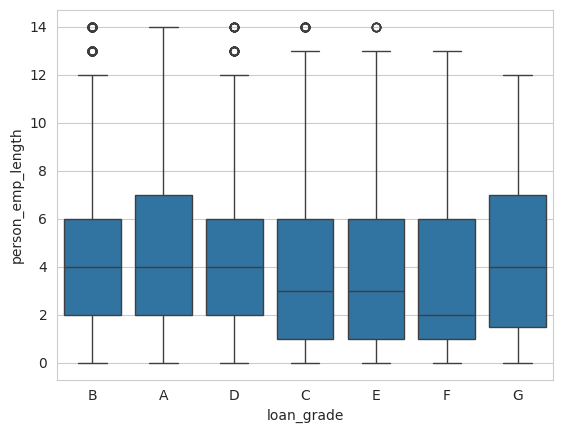

In [ ]:
sns.boxplot(x = 'loan_grade', y = 'person_emp_length', data = df)

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

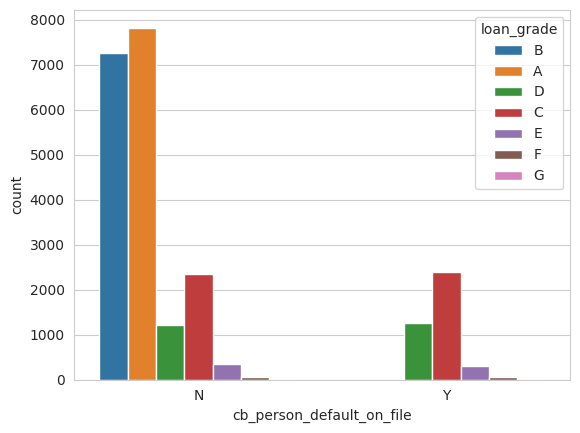

In [ ]:
sns.countplot(x = 'cb_person_default_on_file', hue = 'loan_grade', data = df)

<Axes: xlabel='loan_grade', ylabel='person_age'>

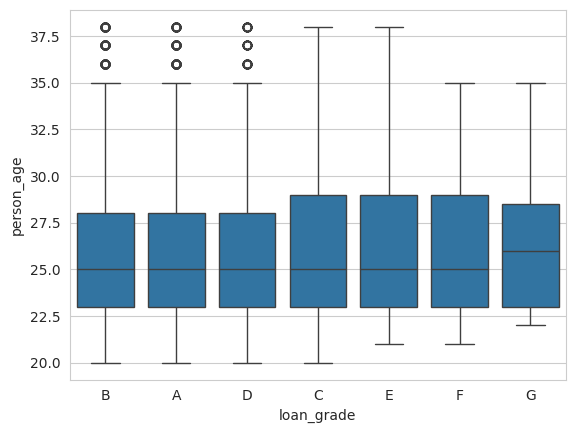

In [ ]:
sns.boxplot(x = 'loan_grade', y = 'person_age', data = df)

<Axes: xlabel='loan_status', ylabel='count'>

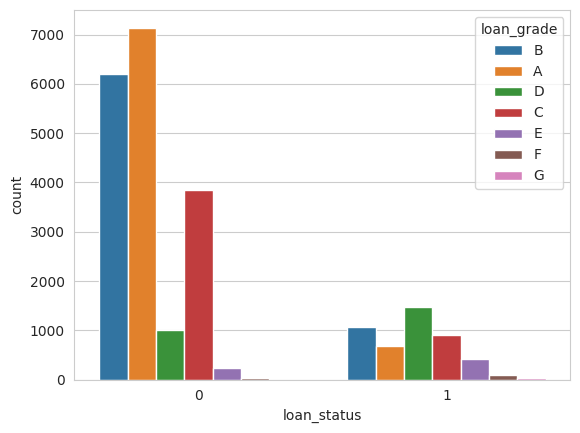

In [ ]:
sns.countplot(x = 'loan_status', hue = 'loan_grade', data = df)

<Axes: xlabel='loan_grade', ylabel='loan_percent_income'>

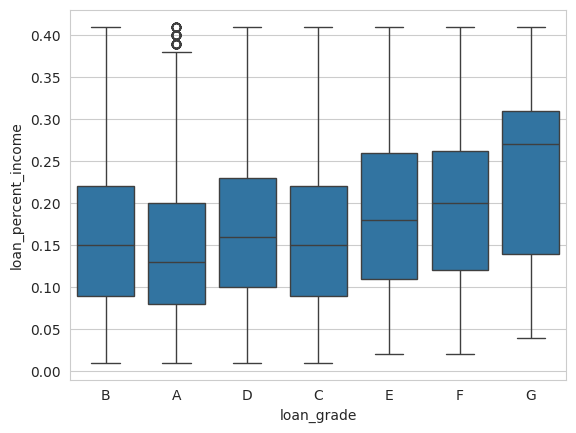

In [ ]:
sns.boxplot(x = 'loan_grade', y = 'loan_percent_income', data = df)

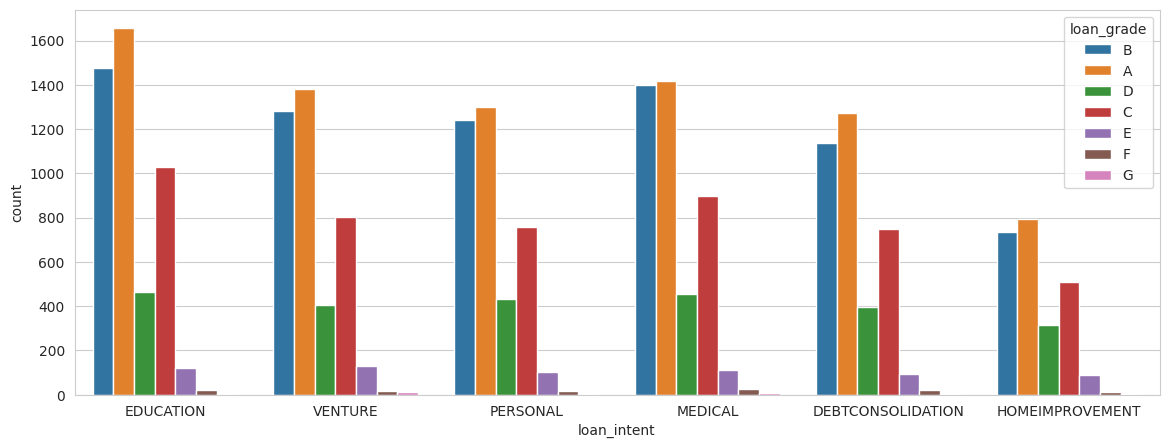

In [ ]:
plt.figure(figsize = (14, 5))
sns.countplot(x = 'loan_intent', hue = 'loan_grade', data = df)
plt.show()

<Axes: >

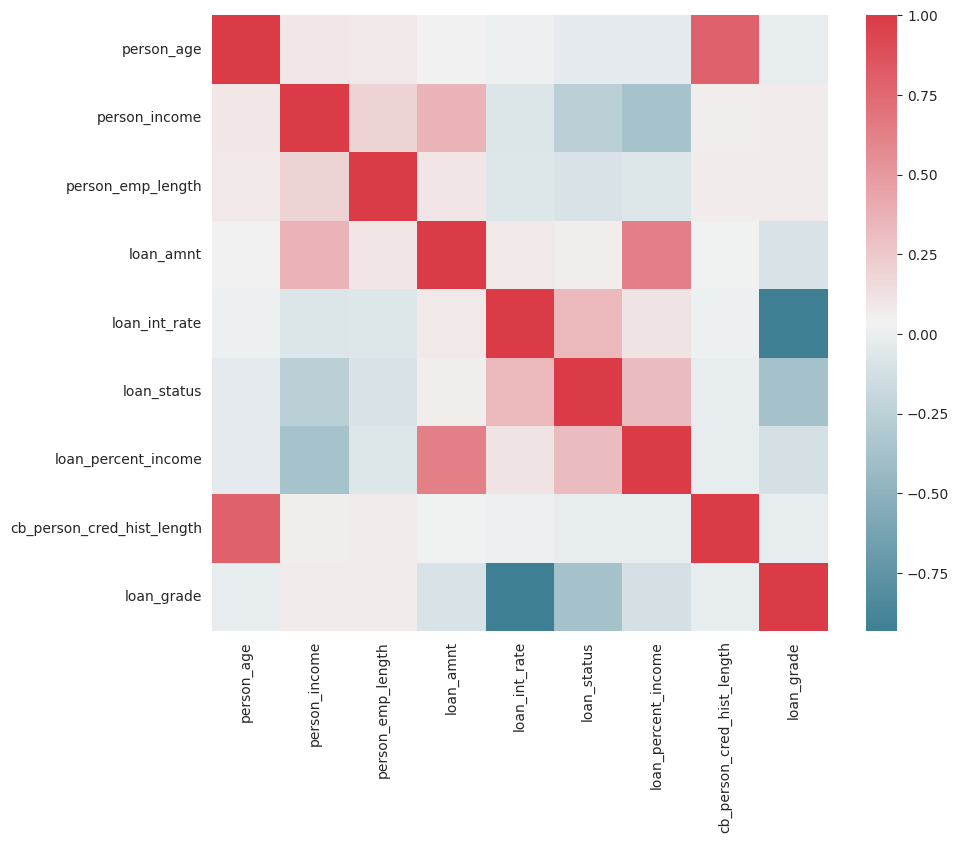

In [ ]:
numeric_df = df.select_dtypes(include = ['float64', 'int64']).copy()

mapiranje = {'G': 0, 'F': 1, 'E': 2, 'D': 3, 'C': 4, 'B': 5, 'A': 6}

numeric_df['loan_grade'] = df['loan_grade'].map(mapiranje)

correlation_matrix = numeric_df.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            mask = np.zeros_like(correlation_matrix),
            cmap = sns.diverging_palette(220, 10, as_cmap = True),
            square = True, ax = ax)

In [ ]:
label_encoder = LabelEncoder()
df['person_home_ownership'] = label_encoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = label_encoder.fit_transform(df['loan_intent'])
df['loan_grade'] = label_encoder.fit_transform(df['loan_grade'])
df['cb_person_default_on_file'] = label_encoder.fit_transform(df['cb_person_default_on_file'])

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2
9,21,10000,2,6.0,5,3,1600,14.74,1,0.16,0,3
19,24,10800,0,8.0,1,1,1750,10.99,1,0.16,0,2
23,24,10980,2,0.0,4,0,1500,7.29,0,0.14,0,3


In [ ]:
scaler = MinMaxScaler()
numeric_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

In [ ]:
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [ ]:
X = df.drop(columns = ['loan_grade', 'loan_intent'])

In [ ]:
y = df['loan_grade']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
model = GradientBoostingClassifier(n_estimators = 250)

In [ ]:
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=250)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_test == y_predict

1944     True
11818    True
28060    True
20980    True
13766    True
         ... 
17314    True
21914    True
24443    True
15055    True
28856    True
Name: loan_grade, Length: 4617, dtype: bool

In [ ]:
sum(y_test == y_predict) / len(y_test)

0.9811565951916829

In [ ]:
X_nepoznato = X_nepoznato = pd.DataFrame({
    'person_age': [30, 35, 40],
    'person_income': [52450, 34522, 7430],
    'person_home_ownership': [2, 0, 1],
    'person_emp_length': [4.0, 5.7, 7.4],
    'loan_amnt': [1500, 25000, 4000],
    'loan_int_rate': [7.10, 12.5, 11.0],
    'loan_status': [0, 0, 1],
    'loan_percent_income': [0.15, 0.74, 0.20],
    'cb_person_default_on_file': [0, 1, 0],
    'cb_person_cred_hist_length': [3, 7, 10],
})

In [ ]:
numeric_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_amnt']

In [ ]:
X_nepoznato[numeric_columns] = scaler.fit_transform(X_nepoznato[numeric_columns])

In [ ]:
y_nepoznato_predict = model.predict(X_nepoznato)

In [ ]:
y_nepoznato_predict

array([0, 4, 4])

Text(0.5, 1.0, 'Matrica konfuzije')

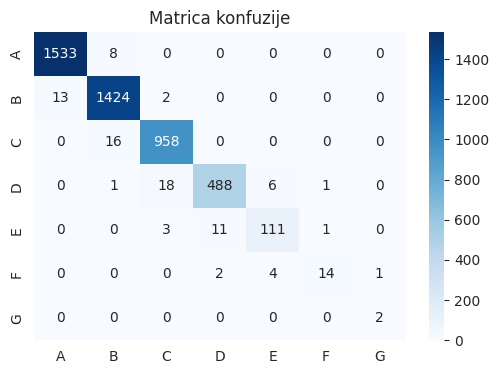

In [ ]:
matrica_konfuzije = confusion_matrix(y_test, y_predict)
plt.figure(figsize = (6, 4))
sns.heatmap(matrica_konfuzije, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], yticklabels = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

plt.title('Matrica konfuzije')

In [ ]:
target_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99      1541
           B       0.98      0.99      0.99      1439
           C       0.98      0.98      0.98       974
           D       0.97      0.95      0.96       514
           E       0.92      0.88      0.90       126
           F       0.88      0.67      0.76        21
           G       0.67      1.00      0.80         2

    accuracy                           0.98      4617
   macro avg       0.91      0.92      0.91      4617
weighted avg       0.98      0.98      0.98      4617

